In [9]:
""" The following code """

In [10]:
# initialize code on the notebook with these packages

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [11]:
# import the dataset

state_econ = pd.read_csv("../Data/state_econ.csv")

In [12]:
# changed the State and Year columns from columns to indicies

state_econ = state_econ.set_index(["State", "Year"])

In [13]:
# removed features that are highly colinear with other features and with each other

state_econ = state_econ.drop(["Population", "GDP (in millions USD)", "Unadjusted Household Income"], axis = 1)

In [14]:
state_econ

,,gini,min_wage,unemployment,Residents with Bachelor's Degree or Higher,GDP per Capita,% with College Degree,Union Membership %,Adjusted Household Income
State,Year,,,,,,,,
Alabama,2010,0.4720,7.25,10.375000,439863.0,36668.583649,9.191967,10.1,43464.0
Alaska,2010,0.4220,7.75,8.133333,83346.0,74158.000518,11.673354,22.9,63648.0
Arizona,2010,0.4550,7.25,10.300000,691889.0,38686.541091,10.787611,6.4,47044.0
Arkansas,2010,0.4580,6.25,7.858333,252888.0,34560.033078,8.655787,4.0,39018.0
California,2010,0.4710,8.00,12.458333,4610875.0,52839.238517,12.345257,17.5,57020.0
...,...,...,...,...,...,...,...,...,...
Virginia,2019,0.4690,7.25,2.758333,1312800.0,65245.616582,15.380436,11.2,92610.0
Washington,2019,0.4577,13.50,4.233333,1204728.0,80499.686601,15.820682,4.0,93910.0
West Virginia,2019,0.4644,8.75,4.933333,161686.0,44005.262961,9.021916,10.2,61170.0


In [15]:
# split the data into training and testing sets
econ_train, econ_test, gini_train, gini_test = train_test_split(state_econ[state_econ.columns[1:]], state_econ["gini"],
test_size = 0.2, random_state = 69)

# initialize RandomForestRegressor with desired parameters
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# fit the model using the training data
rf_regressor.fit(econ_train, gini_train)

# predict on the test set
predictions = rf_regressor.predict(econ_test)

# calculate Mean Squared Error
mse = mean_squared_error(gini_test, predictions)
print(f"Mean Squared Error: ", mse)


Mean Squared Error:  6.556317707999988e-05


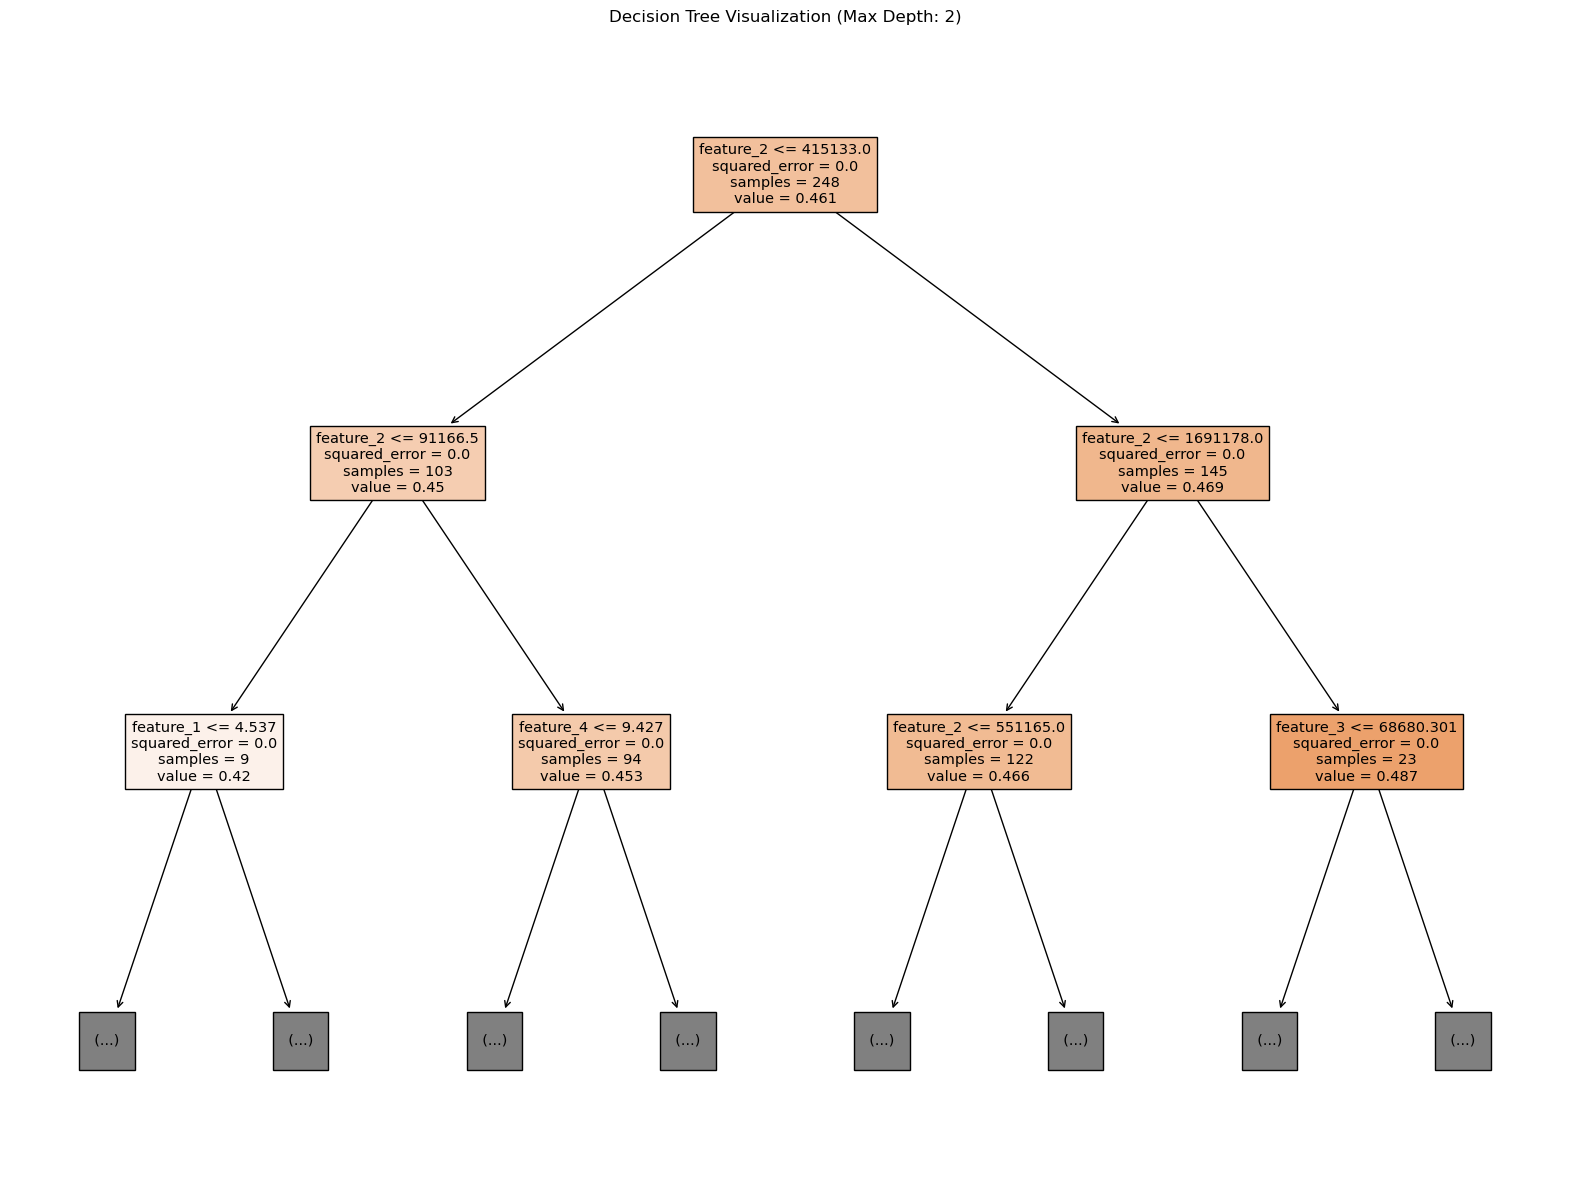

In [26]:
# defining a new dataset as every column without the gini coefficient
econ = state_econ[state_econ.columns[1:]]

# extracting a single decision tree from the random forest
tree = rf_regressor.estimators_[0]

# Plotting the extracted tree with adjusted figure size and limited depth
plt.figure(figsize=(20, 15))
plot_tree(tree, filled=True, feature_names=[f"feature_{i}" for i in range(econ.shape[1])], max_depth=2)
plt.title(f"Decision Tree Visualization (Max Depth: 2)")
plt.show()

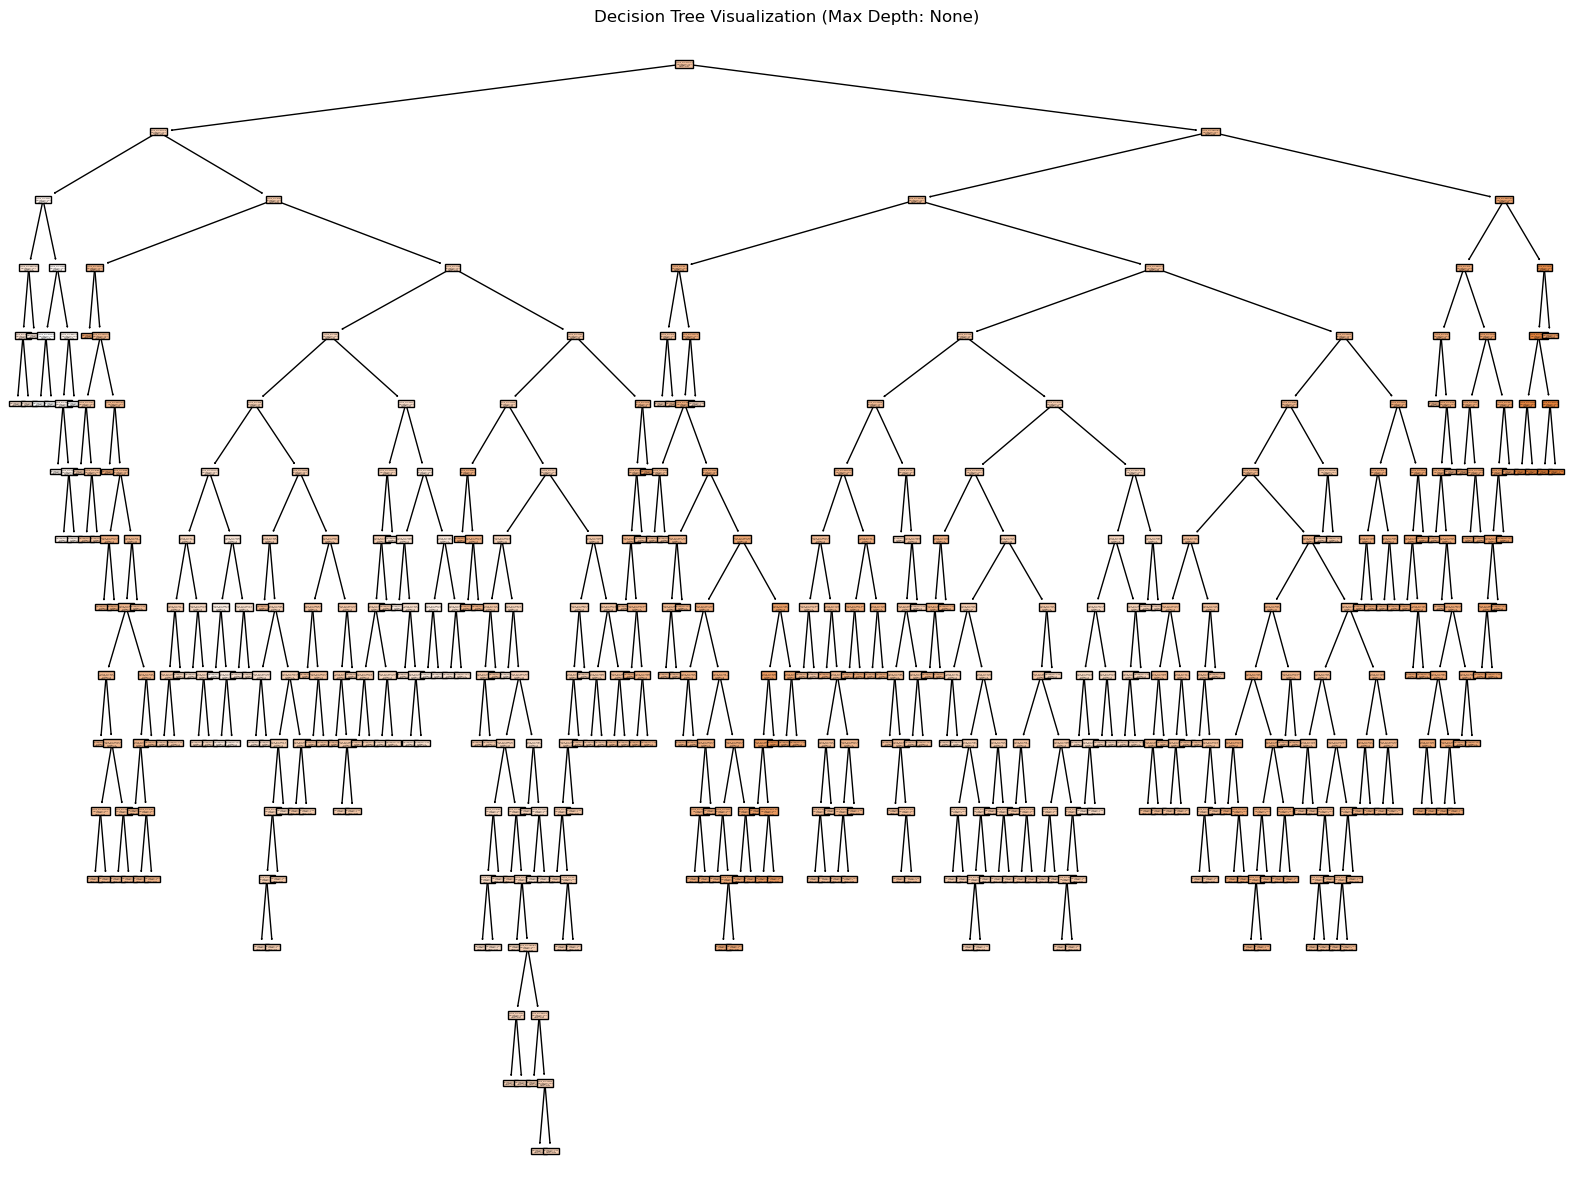

In [28]:
# Plotting the extracted tree with adjusted figure size and without limited depth
plt.figure(figsize=(20, 15))
plot_tree(tree, filled=True, feature_names=[f"feature_{i}" for i in range(econ.shape[1])])
plt.title(f"Decision Tree Visualization (Max Depth: None)")
plt.show()